# ML2 - Grid Search and Randomized Search

## Part 1: Import

In [1]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data, iris.target


## Part 2: Check the classifier

The KNearest classifier has different parameters as we can see below.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier (n_neighbors=5,
                                   weights="uniform",
                                   metric="minkowski",
                                   p=2)

## Part 3: Define the grid

Below, there are a sum of parameters that will be used in different combinations in order to check the results.

In [15]:
#Create the grid with the different parameters to be tested
grid = {"n_neighbors": range(1,11), 
        "weights": ["uniform","distance"],
       "p":[1,2]}
score_metric = "accuracy"
#Print the total amount of models
print ("Number of tested models: %i" %np.prod([len(grid[element]) for element in grid]))

Number of tested models: 40


## Part 4: Identifying the baseline

The baseline shows what is the accuracy of the algorithm by simply applying a cross validation test with the given parameters.

In [16]:
from sklearn.model_selection import cross_val_score

print ("Baseline with default parameters: %.3f" % np.mean(cross_val_score(classifier,
                                                                          X,
                                                                          y,
                                                                          cv=10,
                                                                          scoring=score_metric,
                                                                          n_jobs=1)))

Baseline with default parameters: 0.967


Although it does not make sense to try to find a better accuracy with accuracy of 0.96, the following code will find where is this answer located (in what parameters).

## Part 5: Fit the model with the different parameters

In [45]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator = classifier,
                     param_grid=grid,
                     scoring=score_metric,
                     n_jobs=1,
                     refit=True,
                     cv=10)

search.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

## Part 6: Identify the best model

In [23]:
print ("Best paramaters: %s" % search.best_params_)
print ("CV Accuracy of best parameters: %.3f" % search.best_score_)

Best paramaters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
CV Accuracy of best parameters: 0.973


## Part 7: Visualization

In [46]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(weights="uniform",
    metric="minkowski",
    p=1),
    X,
    y,
    "n_neighbors",
    param_range=range(1,11),
    cv=10,
    scoring="accuracy")

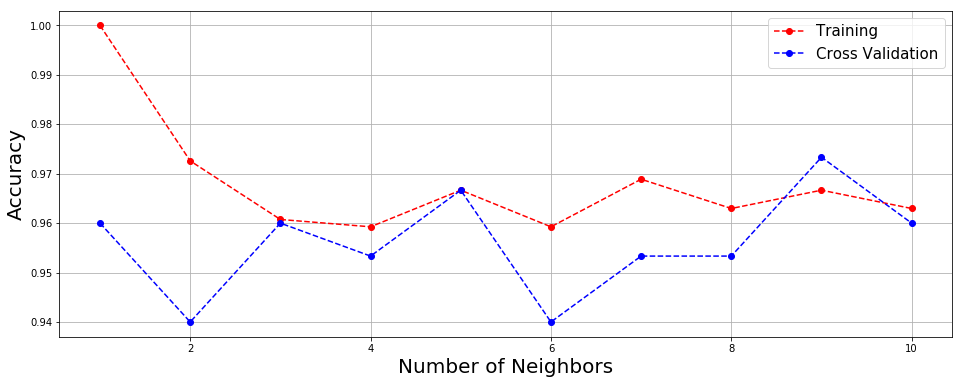

In [47]:
mean_train = np.mean(train_scores,axis=1)
mean_test = np.mean(test_scores,axis=1)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))

plt.plot(range(1,11),mean_train,"ro--",label="Training")
plt.plot(range(1,11),mean_test,"bo--",label="Cross Validation")

plt.grid()
plt.xlabel("Number of Neighbors",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.legend(loc="upper right",numpoints=1,fontsize=15)
plt.show()

## Part 8: Randomized search

The Random search does the same thing as the Grid Search but we define the number of randomized parameters we can pick. Of course, at any time we can check parameters we are using for the experiment.

In [63]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = classifier, 
                             param_distributions=grid,
                             n_iter=10,
                             scoring=score_metric,
                             n_jobs=1,
                             refit=True,
                             cv=10,)

random_search.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance'], 'p': [1, 2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [64]:
print ("Best paramaters: %s" % random_search.best_params_)
print ("CV Accuracy of best parameters: %.3f" % random_search.best_score_)

Best paramaters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 9}
CV Accuracy of best parameters: 0.973
